In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('multiple_linear_regression.csv')

In [5]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
x = np.array(df.iloc[:, :3])
y = np.array(df.iloc[:, 3])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)

## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
model.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [11]:
model.intercept_

3.0777744955280433

In [12]:
model.score(x_test, y_test)

0.9220854203535253

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(x_test))

2.241286253093348

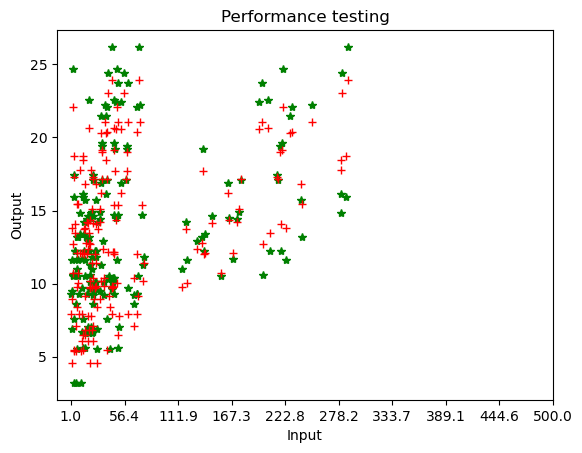

In [14]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, model.predict(x_test), "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()

## Linear Regression with OLS

In [17]:
x_const = sm.add_constant(x_train)
x_const[:5]

array([[  1. , 109.8,  14.3,  31.7],
       [  1. , 134.3,   4.9,   9.3],
       [  1. , 222.4,   4.3,  49.8],
       [  1. ,  25.1,  25.7,  43.3],
       [  1. , 107.4,  14. ,  10.9]])

In [18]:
model = sm.OLS(y_train, x_const)

In [19]:
result = model.fit()

In [20]:
result.params

array([ 3.07777450e+00,  4.59782026e-02,  1.80928665e-01, -1.94225700e-03])

In [24]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.67e-63
Time:                        00:55:13   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

In [27]:
x_test = sm.add_constant(x_test)
y_pred = result.predict(x_test)
residual = y_test - y_pred
residual

array([-2.91710143, -0.66146115,  1.31380726,  1.24046942,  0.42200779,
       -2.83526253,  2.25841588,  1.48068267,  2.63393809, -1.13172907,
        1.36884097,  1.32756209,  0.44270208,  2.12322525, -2.22102256,
        0.27794283, -0.38023645,  0.33905078,  1.12282337,  1.36054984,
        1.73794172, -2.73862691, -2.18082146, -0.23225482,  0.69938459,
       -0.77042699,  1.9748794 ,  1.18033685,  0.52733992,  0.46253827,
        0.11618647, -0.23827164, -0.08376843,  0.36625367, -0.03952183,
       -1.74670527,  0.4184054 ,  0.61864508,  1.53365012, -1.28921606,
        0.18450157, -0.10107337, -2.15398678,  1.15033829,  0.175804  ,
       -1.84780871,  0.16946505, -1.19465714,  2.65582036,  0.45296518,
       -0.8651166 ,  1.79449192,  1.50133446, -2.94668208,  0.50501087,
       -2.09345805,  1.81053278, -2.3269009 ,  2.30854379, -0.22129794])

## Linear Model Assumptions

### Homoscedasticity

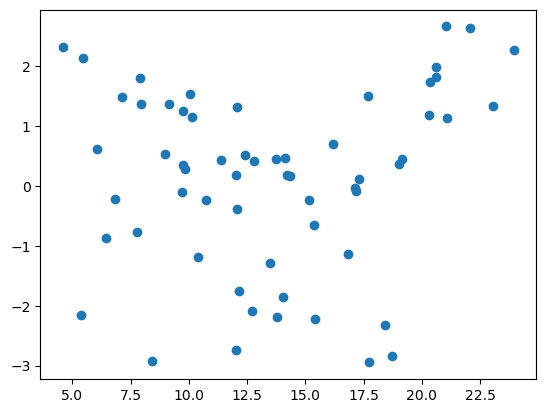

In [28]:
plt.scatter(y_pred, residual)

### Normality of Residuals

<AxesSubplot:ylabel='Density'>

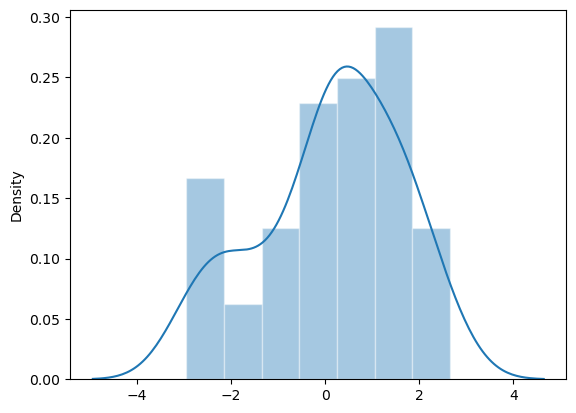

In [38]:
sns.histplot(residual, kde=True,
             stat = "density", kde_kws = dict(cut = 3),
             alpha = .4, edgecolor = (1, 1, 1, .4)
             )

In [30]:
np.mean(residual)

0.1139829982453096